In [1]:
print("Hello world")

Hello world


In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()
#Notice the `total_bedrooms` property doesn't have 20640 entries just like the other ones (Some entries for total bedrooms is Null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts() #View distribution of values with this

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe() #Discribes dataset, and average, quartile, deviation values for properties, etc...

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


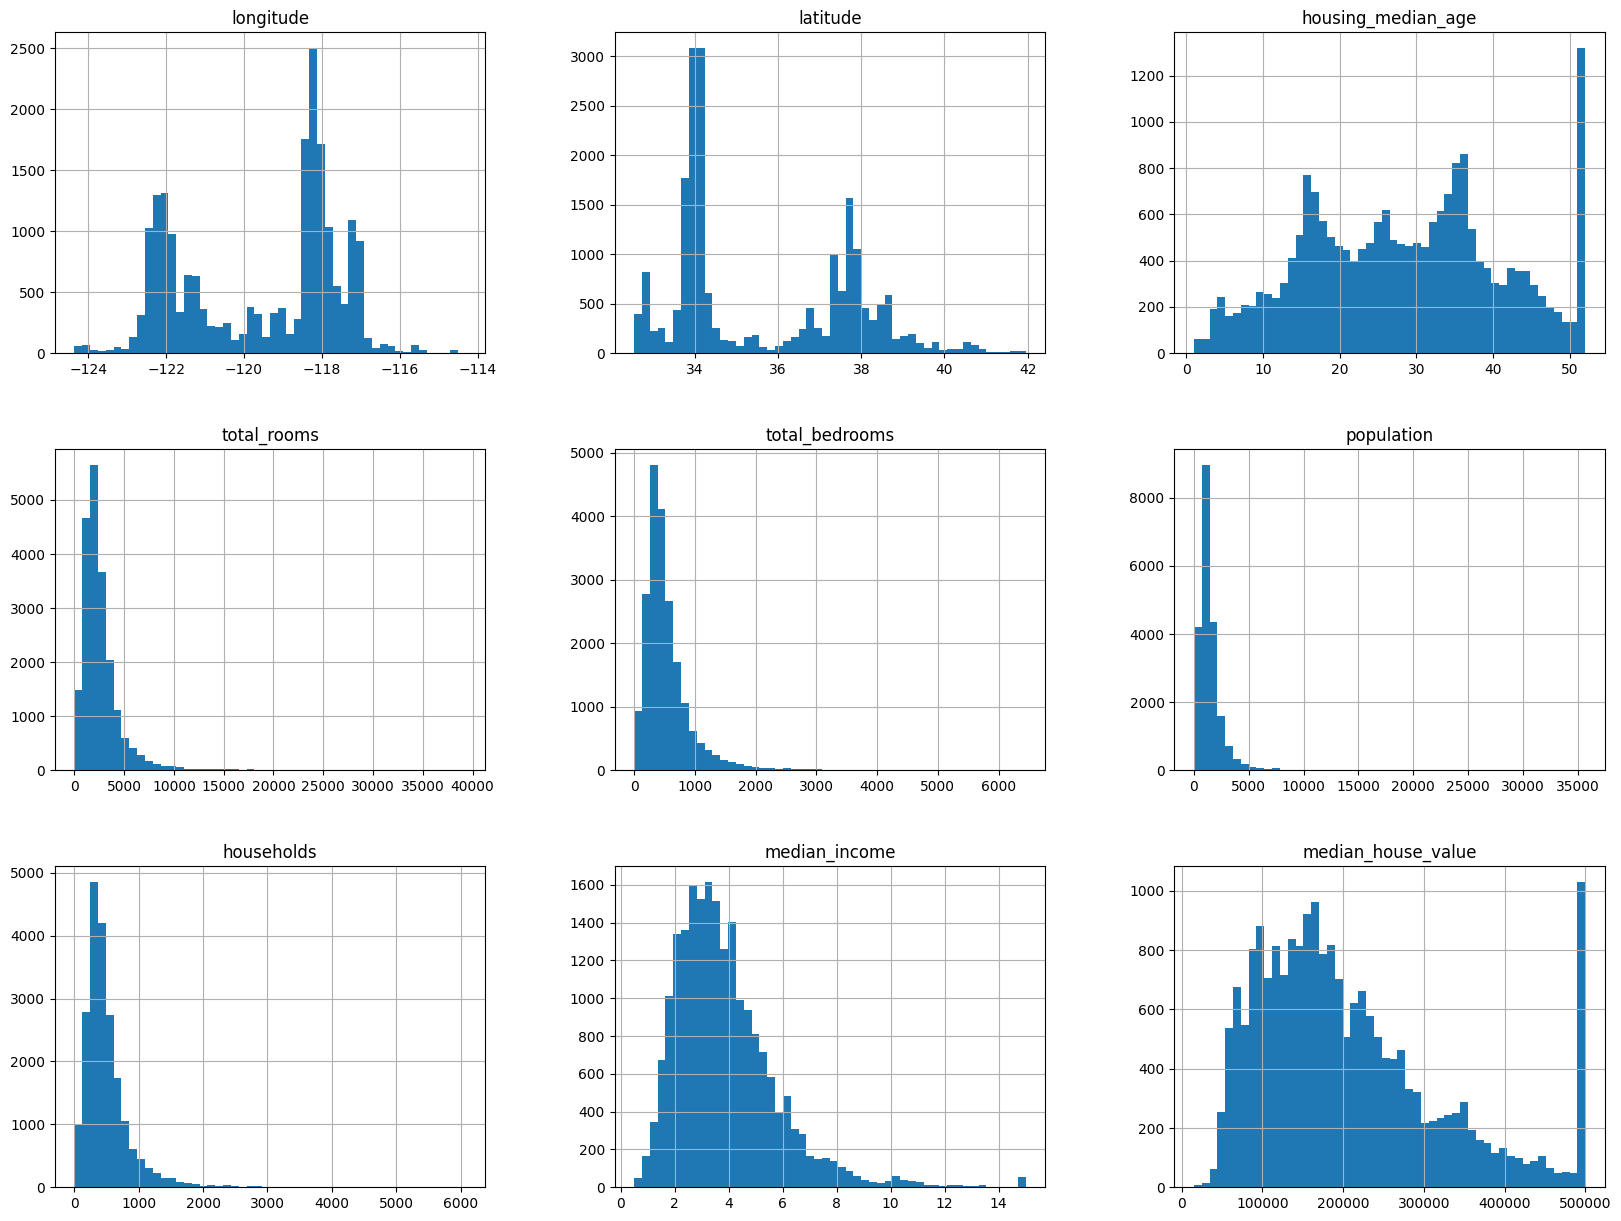

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plot
housing.hist(bins=50,figsize=(20,15)) #Plots a Histogram (with some input params)
plot.show()

In [10]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [11]:
import numpy as np

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set) #Set the Algorithm will be trained on (16.5k entries)

16512

In [13]:
len(test_set) #Set it will be tested on, for accuracy measures

4128

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio): ##Hash Operational And Threshold comparison
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

<AxesSubplot: >

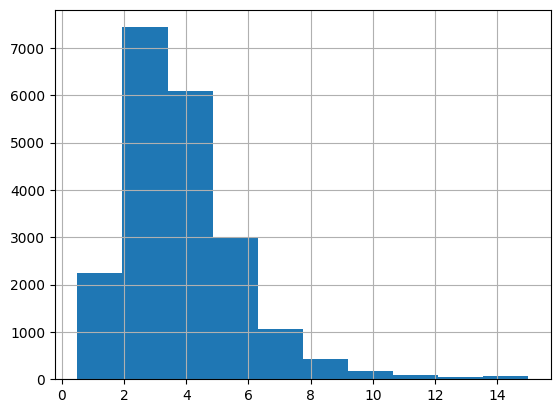

In [15]:
#Now adding some Stratified Splitting methods
#Let's first check the histogram of the median_income just to view a general distribution curve
housing["median_income"].hist()


In [16]:
#Good looks, OK now this one
# PandaS pd.cut is use to segment data into so called "bins" which are essentially just ranges (set in the bin array param) and with a label
#Here we set 5 labels
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])



<AxesSubplot: >

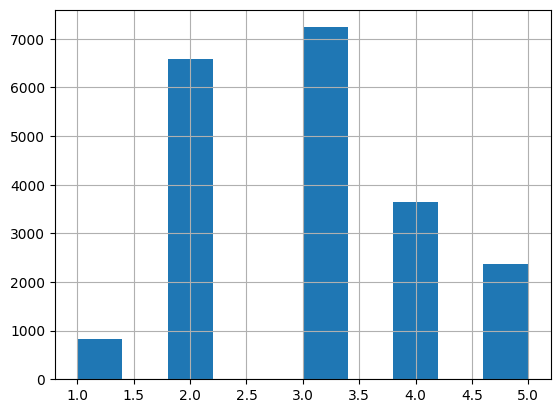

In [17]:
housing["income_cat"].hist()


In [18]:
#Stratified Shuffling from Sklearn
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [20]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [21]:
#Ratios (Proportionality) Looks fine

In [22]:
from sklearn.model_selection import train_test_split #Re-importing the sklearn random test splitting fn

#Making a table Dataframe to compare the Stratified & Randomized Samples
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props



,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [23]:
#Now we drop the income_cat to return the data to it's original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

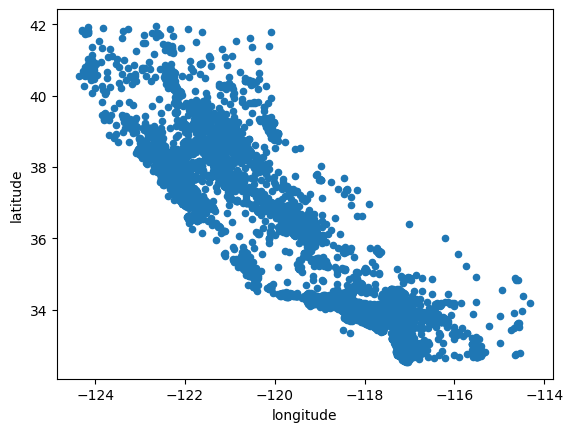

In [24]:
# Discover and visualize the data to gain insights
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

#Represents a geographical map of sample points
# Looks like California alright! 

#BAD PLOT !!!
# - Can't really see high density areas or anything, just position of data (unless it's clustered, then not really even that)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

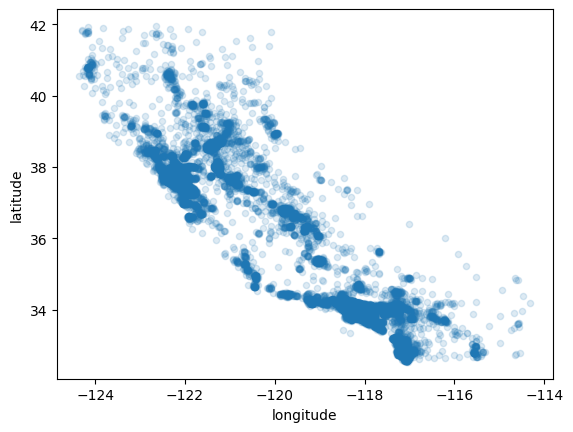

In [25]:
#Adding an alpha value to all datapoints to visualize where the clusters are:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.15)
#Can clearly see high density areas of the dataset

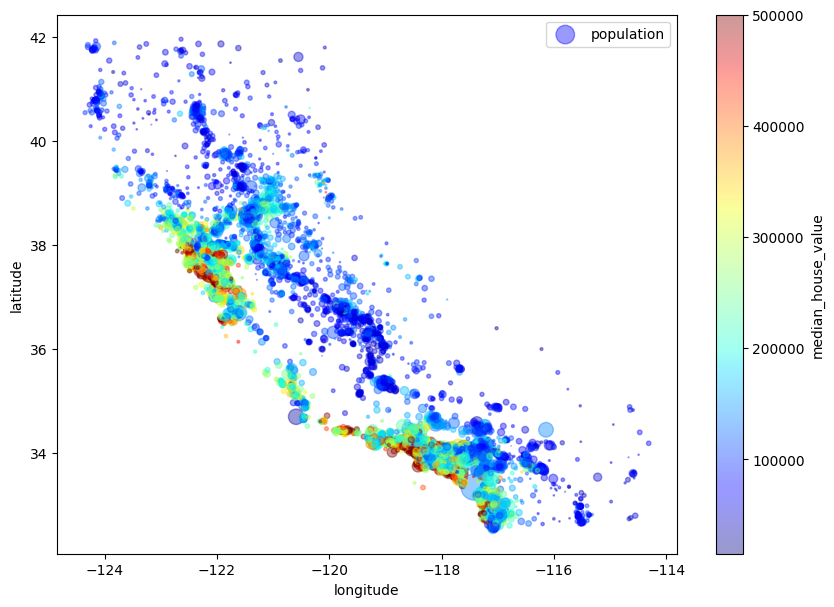

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plot.get_cmap("jet"), colorbar=True,
    sharex=False)

#Plotting the housing graph using the Matplotlib "Scatter" with xy as lon. lat, include the alpha for easy viewing of clusters.
#Param `s` indicates to draw larger radius circles for higher population densities of areas,
#Param `c` is for the color associated based on `median_house_value` property of data row, 
#with the schema "jet" which is just a rainbow color schema going from blue to various colors, to red at the end \/ 

plot.legend()



In [27]:
#IN the book, Aurelien overlays this plot graph above onto a scaled image of California, 
#it looks really good but I don't want to get it working lol

In [28]:
#Let's do the corrolation matrix now based on the median_house_value, we can see what trends are corrolated and match up with
# `median_house_value`, and which don't.

In [29]:
corr_matrix = housing.corr() #Caution Deprecated
corr_matrix["median_house_value"].sort_values(ascending=False)

#We can see here at median_income looks pretty corrolated to median_house_value, which makes sense Total_rooms also makes sense
#more rooms, bigger house, more price, probably better location, median_age seems to make sense aswell, older people bought nicer
#Properties earlier in time, and now have aqquired a nice valuation on their home.

C:\Users\jason\AppData\Local\Temp\ipykernel_12128\2945928229.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr() #Caution Deprecated


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

## Corrolations (Evaluating Corrolations from the Corr Matrix for `median_house_value`):

Note: These Corrolations only represent a linear corrolation of data, as X goes up, Y goes up is an example of a positive corrolation, a negative corrolation would be as X goes up, Y goes down.

#### Positive Corrolations:
- We can see here at median_income is Positively corrolated to `median_house_value`, which makes sense. *(People with more income spend more on houses)* , `total_rooms` also makes sense intuitively. *(Larger, more expensive houses have more rooms)*

#### NO Corrolations (or very little)
- Looking at the `households` (House Units, example apartments in a building) and `total_bedrooms` those attributes have very litle positive corrolation. The `population` has the least amount of corrolation to `median_house_value` at (+/-) 0.02. (It's actually negatively corrolated)

#### Negative Corrolations:
We got `longitutde` & `latitude` here, this might be an indication that the houses by the ocean, ( 1H > OCEAN ) are higher in value.


array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

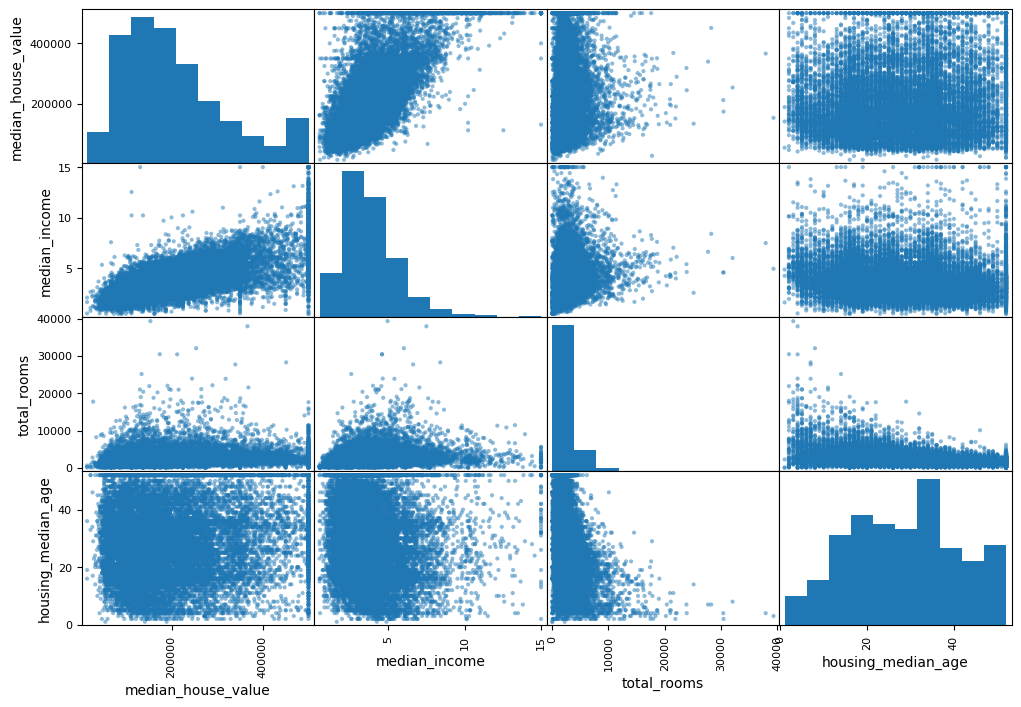

In [30]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

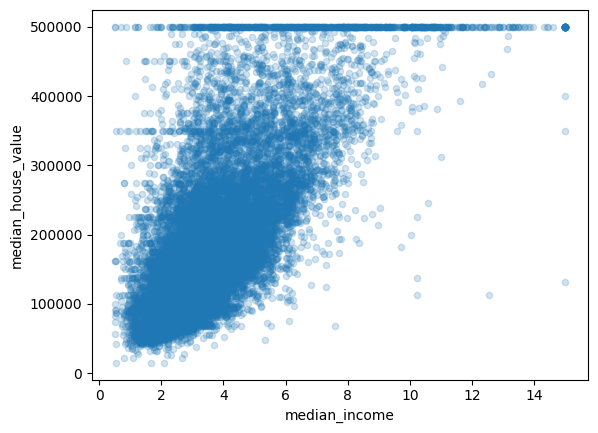

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

# Analyze some Data:

### Cross referencing parameters with each other  via the `scatter_matrix` from SciKit, this allows you to compare every attribute with every attribute on in terms of X, Y scatter plots.

Looking at `median_house_value` VS. `median_income`

#### Notice:

- We can clearly see the upward trend, as `median_income` on the X axis increases, we see the upward trend of `median_house_value`, and it looks pretty linear aswell, the data isn't that dispersed.

- We definitely see a horizontal line (Cluster) at the **500k** mark, this indicates the dataset seems to cap at 500k

- We can also see some Horizontal Lines at **280k, 350k & 450k** This kind of noise can skew our ML model
- All in All tho, pretty clean & linear positive corrolation


In [32]:
# Some attributes are just Irrelevant, so lets combine some and make them more relevent and useful:
# Mentioned in the book as : ATTRIBUTE COMBINATIONS


housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [33]:
# New cors matrix ( with attrib. combos)
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\jason\AppData\Local\Temp\ipykernel_12128\4223158655.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [34]:
# Rooms_per_household (our new attrib) is now positively corrolated highly. :-D
# bedrooms_per_room is also highly corrolated (negatively) but still 

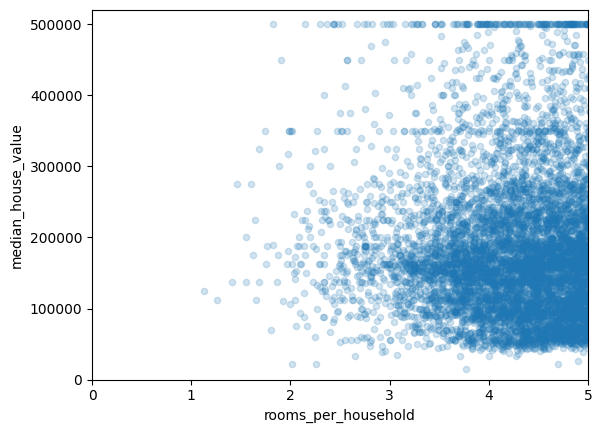

In [35]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plot.axis([0, 5, 0, 520000])
plot.show()

In [36]:
housing.describe()
# Notice how `total_bedrooms` and `bedrooms_per_room` are lacking some entries 
#( 150 entries short ) on the count

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

In [37]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()
#Reverting to a clean dataset for `housing`

# Data Cleaning

In [38]:
#In the book we're given 3 options, let's first check out some incomplete (bad) rows:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows
#we see the `total_bedrooms` here is NaN (missing)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [39]:
#Option 1 is to simply drop all N/A Rows (according to the total_bedrooms)
#sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

#lets just roll with Option 3, since we don't need to delete data, but instead fill it 
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows #For display of table in Jupyter

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [40]:
from sklearn.impute import SimpleImputer
#Now we'll use the SciKit Learn's SimpleImputer 

imputer = SimpleImputer(strategy="median")

#Remove the text attribute because median can only be calculated on numerical attributes:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num) #Fitting the dataset w/o `ocean_proximity`
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [41]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [42]:
#Replace the Missing Values in Housing_num with respectively column medians
X = imputer.transform(housing_num) 

In [43]:
# Convert `X` back into a dataframe:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [44]:
#This function locates our incomplete_rows, which are now complete !!

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [45]:
#Once again, our imputer strat is:
imputer.strategy

'median'

## Handling Text and Categorical Attributes
In this case, we've got the `ocean_proximity` parameter which indicates how far the house is away from the ocean, in **ENUM** like strings representing a rough distance from the ocean. 

Computers just don't like working with strings as data, so let's convert it into numerical info. We can use an Ordinal Encoding method just like calling `ENUM.ordinal()` in Java, but instead we're fitting these Ordinals and transforming the dataset *(hence why `fit_transform` is used)*


In [46]:
#Let's check out some `ocean_proximity` values (what they look like)
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(15)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [47]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:15] #Show 15 indice

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [4.]])

In [48]:
ordinal_encoder.categories_ #all Encoded Ordinal Categories 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]


This type of Ordinal Encoding can be an issue for ML, since it will take the 0-5 values as something like this ( Bad (0), OK (1), Good (2) , Excellent (3) ... ) when in reality, our Textual data doesn't represent a scale in order like this...

### One-Hot Encoding:

Here we know our **'<1H OCEAN'** is Hot, everyone wants to live near the Ocean, whereas 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN' Attributes just aren't that good. So let **'<1H OCEAN'** be a **1**, and all other categories are **0**. Now we have a better system for numerically categorizing more & less diserable textual attributes, This is known as One-Hot Encoding, where 1 kind of category is hot (a 1), and every other category isn't.



In [49]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
#Returns a `sparse matrix of type '<class 'numpy.float64'>`

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [50]:
#let's convert it to a dense array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [51]:
#Still the same categories, we've just encoded them different, and we'll use the `cat_encoder` numerical attributes instead 
# Of the Ordinal Encoded one
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers ?

Creating custom transformer to add extra attributes to data. *(Remember above how we combined some attributes into 1 more useful and corrolated attribute?)* Well now we'll write a transformer pipeline so it's easy for us to preform the same actions on new data.

Scikit Learn uses duck-typing to integrate custom classes (Custom Estimators, transformers, etc...). For us to define a custom transformer as a SKLearn transformer we must implement the following class methods:
`fit()` , `transform()` and `fit_transform()` 

Inheriting from the `TransformerMixin` class, the `fit_transform()` method is taken care of ! now let's just define fit & transform in our custom transformer.

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)